### Problem Statement :

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for 
a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled 
wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock 
belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona 
pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up 
with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the 
economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
<li>Which variables are significant in predicting the demand for shared bikes.</li>
<li>How well those variables describe the bike demands</li>
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

## Imporitng the required packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### Read csv file:

In [2]:
df = pd.read_csv(r'C:\Users\sprag\Documents\PG-AIML\bike-sharing-assignment\day.csv')

In [3]:
# Checking dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Checking shape of df
df.shape

(730, 16)

In [5]:
# find the datatypes of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Print null counts by column
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# check stats of df
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning:

In [8]:
# days_old variable which indicates how old is the business
df['days_old'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [9]:
# print df
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [10]:
# Droping instant column as it is only index, not useful for analysis
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns separately
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns as target column is its sum

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [11]:
# df after dropping
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [12]:
# Number of unique values in all columns
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

In [13]:
# counts of values in season
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [14]:
# counts of values in weathersit
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

## Explonatory Data Analysis & Visualization:

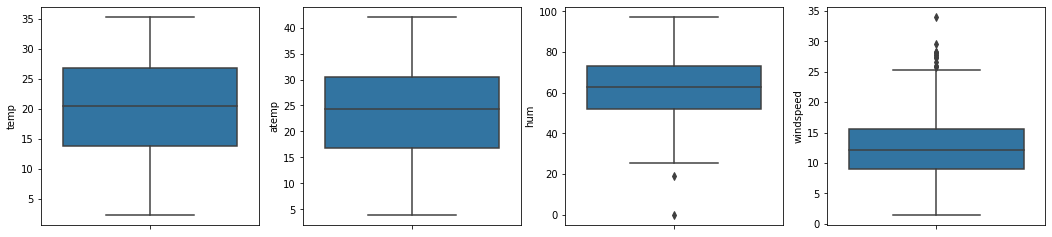

In [15]:
# box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

In [16]:
# converting to categoriacl types
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

df.weekday = df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1080x2160 with 0 Axes>

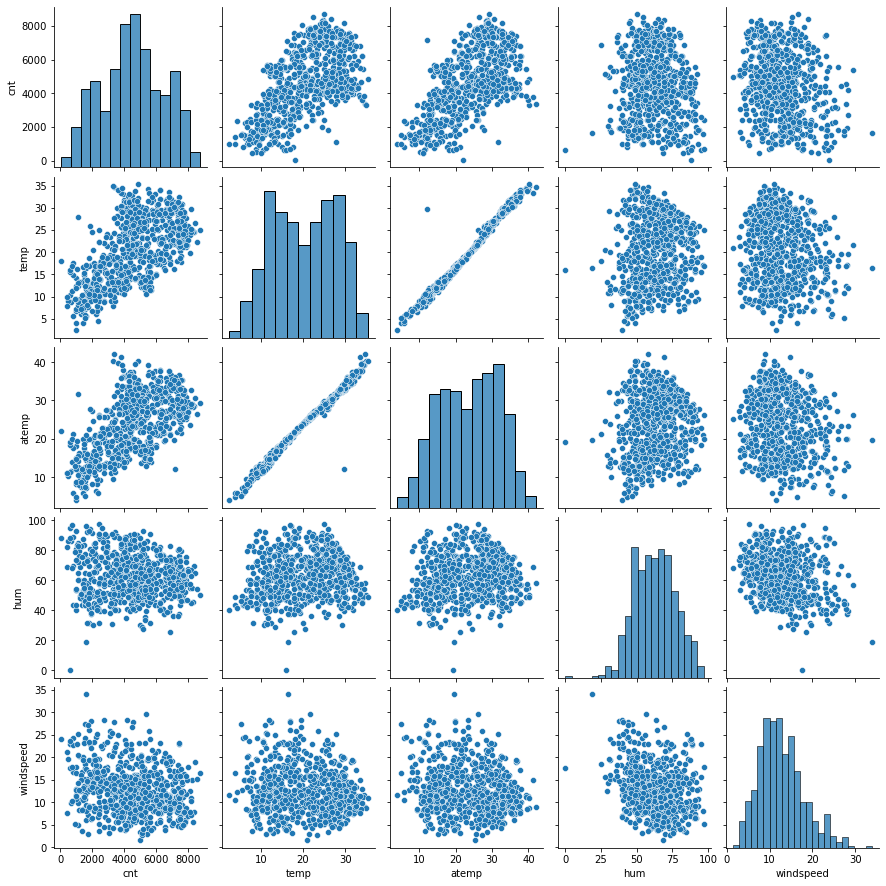

In [17]:
# pairplot for checcking relationship
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

<li>temp and atemp has the highest corelation with cnt
<li>temp and atemp are highly co-related with each other

<Figure size 1440x1080 with 0 Axes>

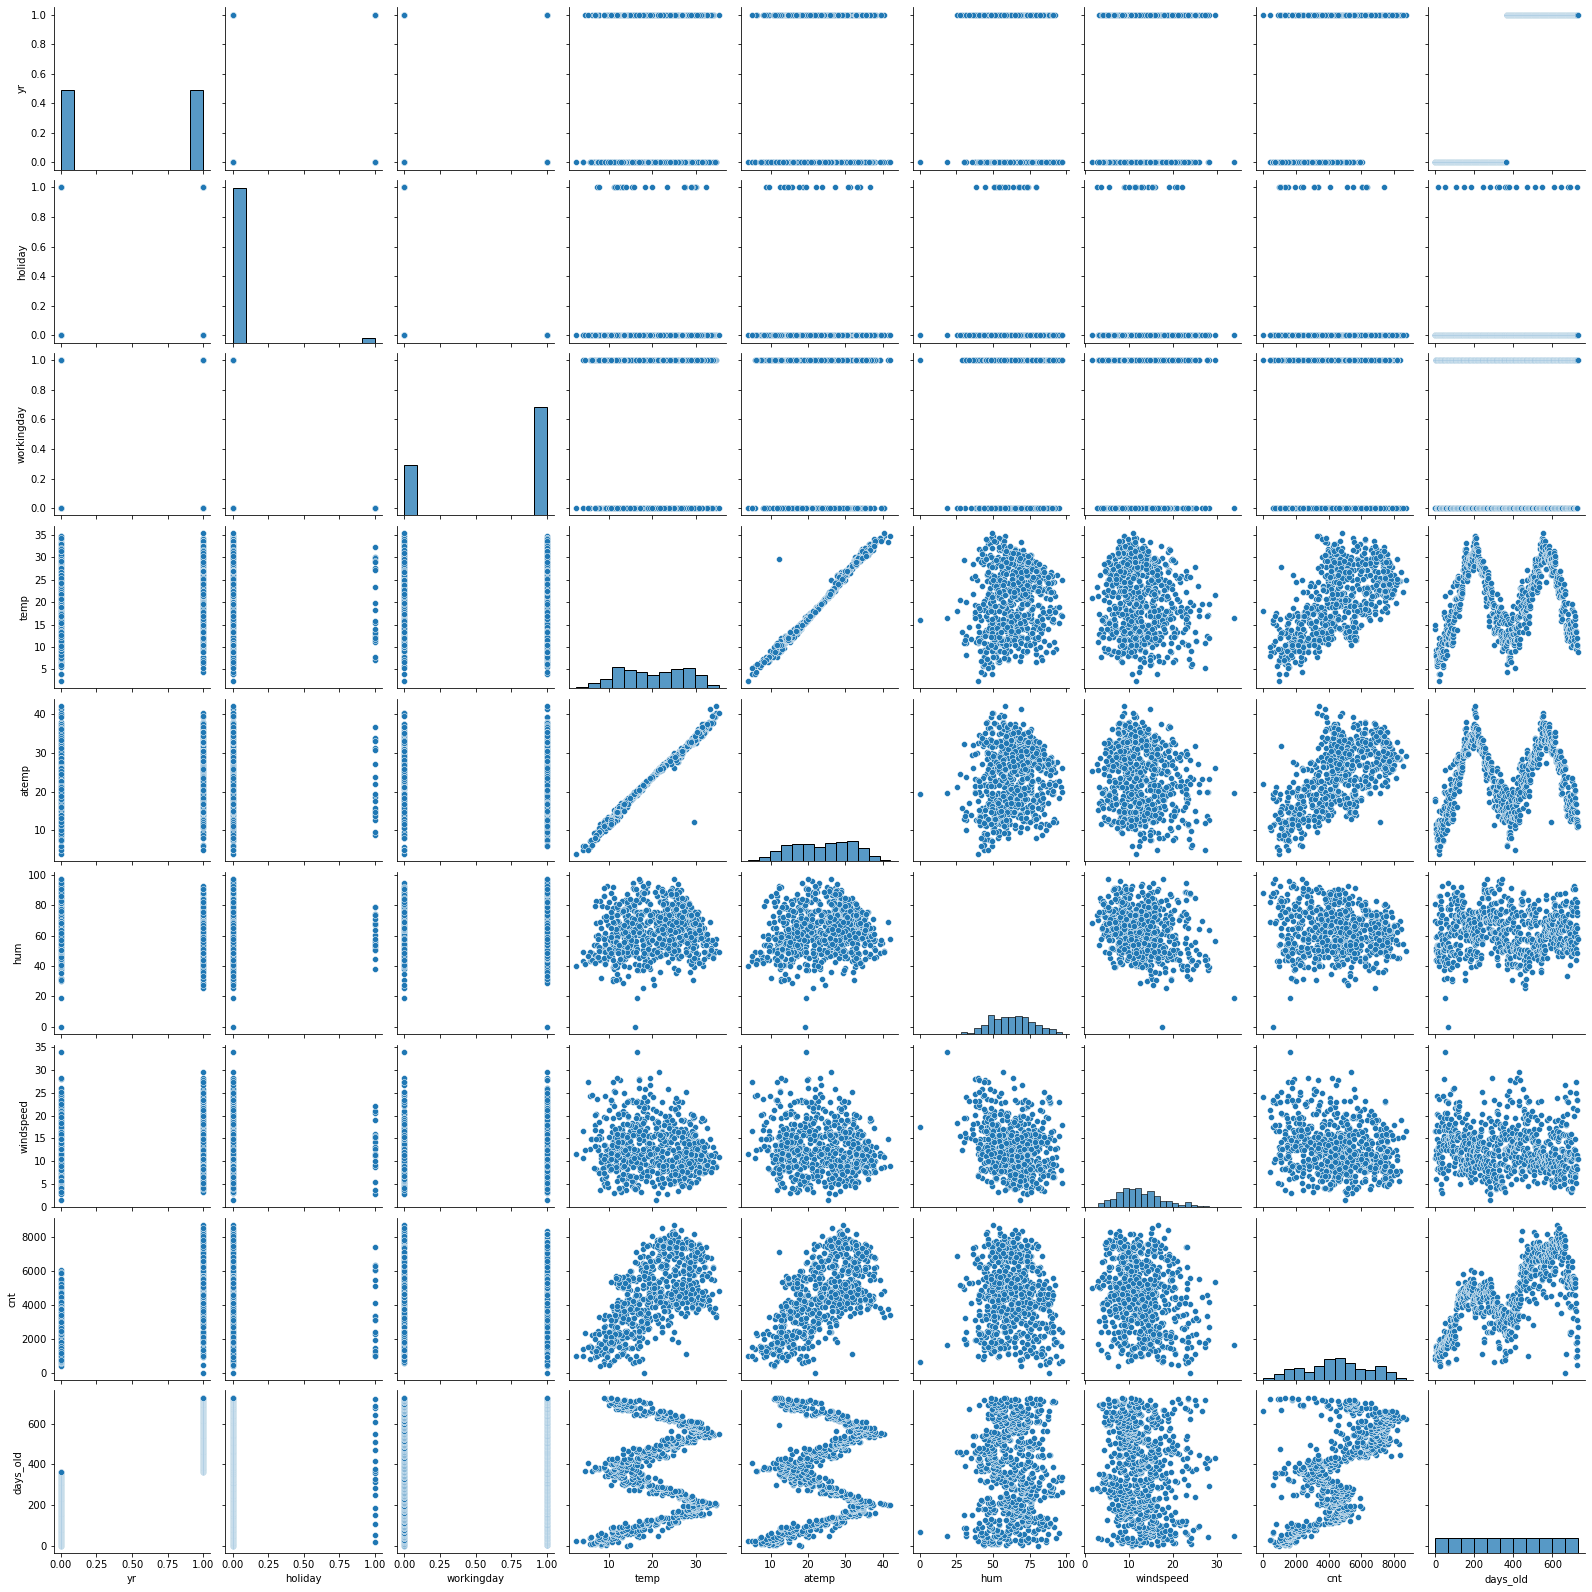

In [18]:
# Visualising the Data to Find the Correlation between the Numerical Variable
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

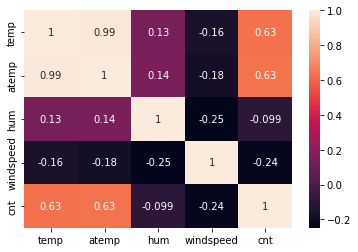

In [19]:
# Checking correlation
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

<li>temp and atemp has correlation of 0.63 ie, correlated with cnt
<li>atemp and temp inter related as it has 0.99 (Multicolinearity)

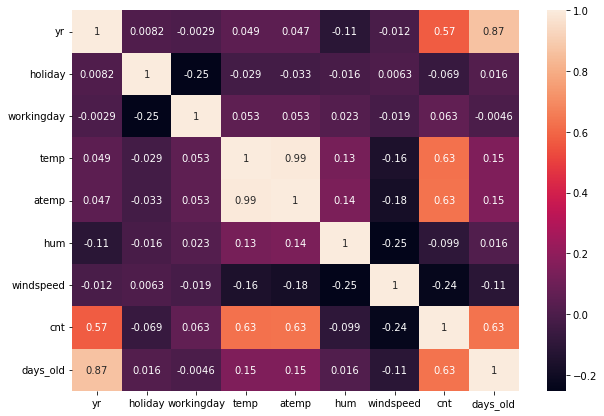

In [20]:
#Correlations plot usuing heatmap
cor=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(cor, annot = True)
plt.show()

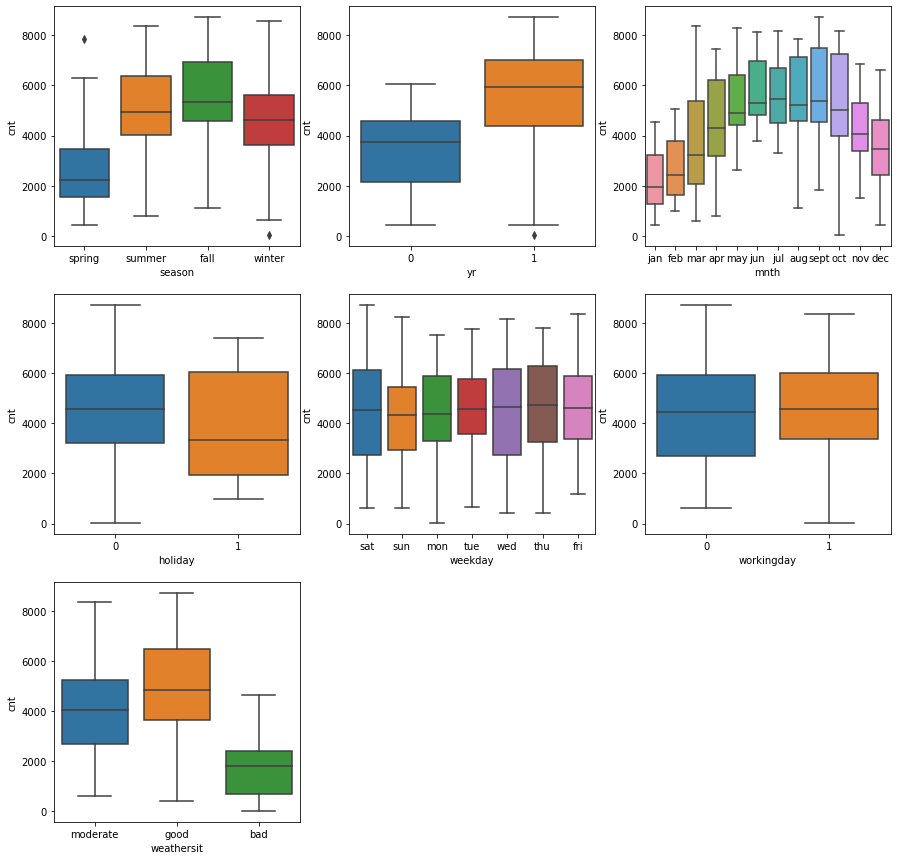

In [21]:
# Boxplot for categorical variables
categorical_var = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(categorical_var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

<li>Season fall has highest demand for rental bikes
<li>Demand for consequitive year has increased
<li>Demand is continuously increasing each month till June. September month has highest demand. After September, demand is decreasing
<li>Good weathersit has highest demand

<AxesSubplot:xlabel='temp', ylabel='cnt'>

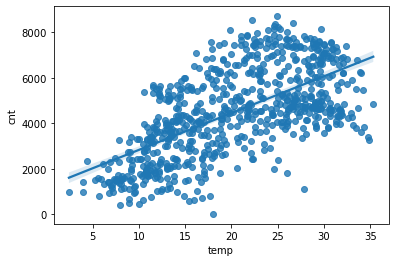

In [22]:
sns.regplot(data=df,y="cnt",x="temp")

<li> cnt is linearly increasing with temp indicating linear relation.

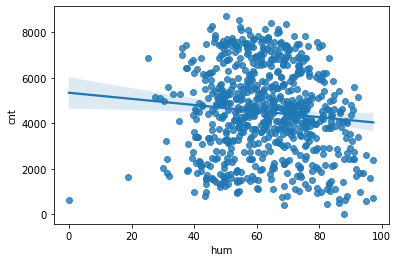

In [23]:
sns.regplot(data=df,y="cnt",x="hum")
plt.show()

<li>Hum's values are more scattered

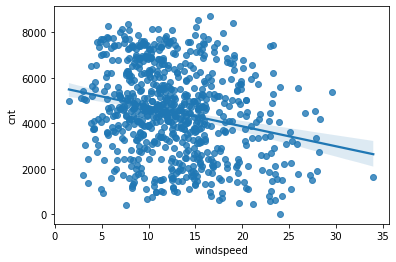

In [24]:
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

<li>Windspeed values are more scattered

In [25]:
# Create dummy variables for categorical variables
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [26]:
# Columns after creating dummies
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [27]:
# Check dataset
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,1,0,1,0


In [28]:
# Checking shape before splitting
df.shape

(730, 32)

In [29]:
#target variable
y=df.pop('cnt')

#independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Shape of train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


In [31]:
#scaling continuous variables
continuous_var = ['temp','atemp','hum','windspeed','days_old']
scaler = MinMaxScaler()

#Fit and transform training set 
X_train[continuous_var] = scaler.fit_transform(X_train[continuous_var])

In [32]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,1,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,1,0,0,0,0,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,1,0,0,0,0,0,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,0,1,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,0,0,1,0,0,1


## Model Building:

In [33]:
# Using Recursive Feature elimination
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 20),
 ('season_winter', False, 2),
 ('mnth_aug', False, 12),
 ('mnth_dec', False, 10),
 ('mnth_feb', False, 15),
 ('mnth_jan', False, 14),
 ('mnth_jul', False, 19),
 ('mnth_jun', False, 13),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 11),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 18),
 ('weekday_sat', False, 7),
 ('weekday_sun', False, 17),
 ('weekday_thu', False, 22),
 ('weekday_tue', False, 16),
 ('weekday_wed', False, 21),
 ('weathersit_bad', True, 1),
 ('weathersit_good', False, 4),
 ('weathersit_moderate', False, 9)]

In [35]:
# VIF for the new models
def vif_cal(cols):
    vif = pd.DataFrame()
    X = X_train[cols]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [36]:
# Fit Model with 15 columns without multi colinearity
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.52e-183
Time:                        21:15:43   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

In [37]:
vif_cal(cols)

               Features    VIF
4                   hum  27.40
3                  temp  17.86
5             windspeed   5.70
2            workingday   5.16
6         season_spring   4.36
8         season_winter   3.22
7         season_summer   2.98
14  weathersit_moderate   2.22
0                    yr   2.10
12          weekday_sat   1.91
10             mnth_jul   1.83
9              mnth_jan   1.68
11            mnth_sept   1.47
13       weathersit_bad   1.27
1               holiday   1.18


 <li>hum variable's VIF value is high

In [38]:
# Dropping the variable hum as p-value is high
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     172.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.72e-180
Time:                        21:15:43   Log-Likelihood:                -4140.0
No. Observations:                 511   AIC:                             8310.
Df Residuals:                     496   BIC:                             8374.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1551.1160    

In [39]:
vif_cal(cols)

               Features   VIF
3                  temp  8.42
4             windspeed  5.69
2            workingday  5.09
5         season_spring  3.00
6         season_summer  2.62
0                    yr  2.09
7         season_winter  2.07
11          weekday_sat  1.88
8              mnth_jul  1.83
9              mnth_jan  1.65
13  weathersit_moderate  1.57
10            mnth_sept  1.42
1               holiday  1.17
12       weathersit_bad  1.09


In [40]:
# Dropping the variable temp as VIF is high
cols = ['yr', 'holiday', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_jan', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     128.4
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.78e-149
Time:                        21:15:43   Log-Likelihood:                -4216.5
No. Observations:                 511   AIC:                             8461.
Df Residuals:                     497   BIC:                             8520.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4657.3933    

In [41]:
vif_cal(cols)

               Features   VIF
3             windspeed  4.95
2            workingday  3.73
4         season_spring  2.91
5         season_summer  2.50
6         season_winter  2.07
0                    yr  2.02
10          weekday_sat  1.64
8              mnth_jan  1.62
12  weathersit_moderate  1.56
7              mnth_jul  1.42
9             mnth_sept  1.27
1               holiday  1.13
11       weathersit_bad  1.08


In [42]:
# Dropping the variable mnth_jul as p-value is high
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
X_train_sm = sm.add_constant(X_train[cols])
lm = sm.OLS(y_train, X_train_sm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.57e-182
Time:                        21:15:43   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

<li> p-value for all the features is 0.0 and R2 is 0.82 and difference between R-squared and Adjusted R-squared values for this model is less

In [43]:
#building model using sklearn
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

#Build a model with above columns
lr = LinearRegression()
lr.fit(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1392.147634256541 [ 1997.33683654   418.6348448   3931.34617764  -769.13660418
  -745.77587948   490.9602611    811.43981815   725.11549979
   466.183871   -2232.96182786  -674.15034578]


In [44]:
# predict
y_train_pred = lr.predict(X_train[cols])

## Model Evaluation:

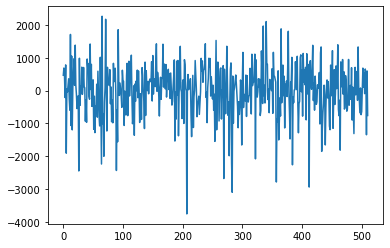

In [45]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.show()

In [46]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8276665291536334

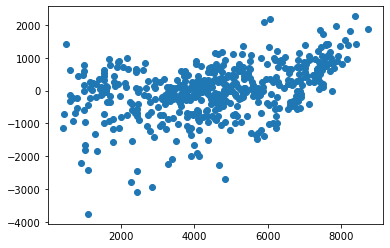

In [47]:
# scatter plot of residual
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.show()

<AxesSubplot:xlabel='cnt', ylabel='Density'>

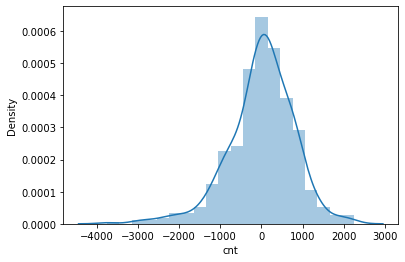

In [48]:
# histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)

<li> Distribution of the residual is normally distributed with mean value as 0

In [49]:
#Scale X_test
numerical_var = ['temp','atemp','hum','windspeed','days_old']

#Test data transform
X_test[numerical_var] = scaler.transform(X_test[numerical_var])

In [50]:
#Predict the values for test data
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

y_test_pred = lr.predict(X_test[cols])

In [51]:
# R2 Value  
r2_score(y_test,y_test_pred)

0.8277694033216871

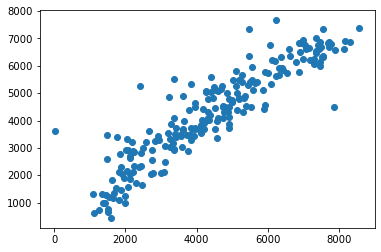

In [52]:
# plot residual
fig = plt.figure()
plt.scatter(y_test, y_test_pred)


#### Thus, Significant variables are :
<li>['yr', 'workingday', 'temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat', 'weathersit_bad', 'weathersit_moderate']
<li>Company should concentrate more on Spring season and september month as there is hike in business during that time.
<li>Company should less number bookings during Light Snow weathersit or Rainy season becuase of unsuitable weather.